In [1]:
from lzt_utils.dataset import LztDataset
from lzt_utils.constants import N_RINGS
from lzt_utils.root import rdf_column_names, rdf_to_pandas, open_vector
from lzt_utils import formulas
from lzt_utils.utils import set_logger
from lzt_utils.norms import norm1
import lzt_utils.plotting.pyplot as lplt

import mplhep
import matplotlib.pyplot as plt
import os
from pathlib import Path
import ROOT
import numpy as np
import pandas as pd
import logging
import json
ROOT.EnableImplicitMT()
plt.style.use(mplhep.style.ROOT)
set_logger()

Module libc not found.


In [2]:
lzt_data = Path.home() / 'ext_data' / 'lorenzetti' / 'v2.1.0'
dataset_name = 'user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_Zee'
dataset_path = lzt_data / dataset_name
output_dir = dataset_path / 'profile'
output_dir.mkdir(exist_ok=True, parents=True)
dataset = LztDataset.from_dir(dataset_path)
dataset

LztDataset(path=/root/ext_data/lorenzetti/v2.1.0/user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_Zee, label=Z->ee)

# Check Data

In [3]:
check_dict = {}
check_dict['hit_event_counter'] = dataset.hit_event_counter
check_dict['esd_event_counter'] = dataset.esd_event_counter
output_filename = output_dir / f'checks.json'
with output_filename.open('w') as f:
    json.dump(check_dict, f, indent=4)
check_dict

{'hit_event_counter': {'Event': 10000, 'Completed': 10000, 'Timeout': 0},
 'esd_event_counter': {'Event': 0, 'Completed': 10000}}

Warning in <TClass::Init>: no dictionary for class xAOD::Seed_t is available
Warning in <TClass::Init>: no dictionary for class xAOD::CaloHit_t is available


In [4]:
ntuple_rdf = dataset.get_ntuple_rdf()
rings_cols, ntuple_rdf = open_vector('cl_rings', N_RINGS, ntuple_rdf)
column_names = rdf_column_names(ntuple_rdf)
ntuple_pdf = rdf_to_pandas(ntuple_rdf, [name for name in column_names if name != 'rings'], nrows=-1)
ntuple_pdf

,EventNumber,RunNumber,avgmu,cl_deta,cl_dphi,cl_e,cl_e0,cl_e1,cl_e2,cl_e233,...,el_phi,el_tight,el_vloose,mc_e,mc_et,mc_eta,mc_pdgid,mc_phi,seed_eta,seed_phi
0,7732,250401,0.0,0.2,0.2,73577.406250,0.000000,39335.265625,34154.187500,28206.892578,...,-1.2640,True,True,[80.31237030029297],[20.601646423339844],[-2.036827802658081],[11.0],[-1.2634787559509277],-2.036828,-1.263479
1,7732,250401,0.0,0.2,0.2,27544.087891,223.072586,15157.333984,11917.576172,10375.167969,...,0.9204,False,True,"[80.31237030029297, 27.909141540527344]","[20.601646423339844, 16.548999786376953]","[-2.036827802658081, 1.1133177280426025]","[11.0, -11.0]","[-1.2634787559509277, 0.9175127744674683]",1.113318,0.917513
2,7740,250401,0.0,0.2,0.2,44174.250000,204.420624,9179.853516,34492.886719,33413.824219,...,-1.5830,True,True,[45.791934967041016],[38.664493560791016],[0.59823077917099],[11.0],[-1.5813297033309937],0.598231,-1.581330
3,7740,250401,0.0,0.2,0.2,103584.335938,-194.130295,57921.734375,45727.640625,41609.484375,...,1.6813,True,True,"[45.791934967041016, 112.23273468017578]","[38.664493560791016, 40.585941314697266]","[0.59823077917099, 1.6758766174316406]","[11.0, -11.0]","[-1.5813297033309937, 1.6716477870941162]",1.675877,1.671648
4,7745,250401,0.0,0.2,0.2,158955.187500,0.000000,16607.373047,142128.671875,121965.742188,...,-1.2149,True,True,[171.5811309814453],[32.76942443847656],[2.339461326599121],[11.0],[-1.2197000980377197],2.339461,-1.219700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16566,5905,250401,0.0,0.2,0.2,28104.234375,422.126587,8265.257812,20257.251953,18738.095703,...,2.4912,False,True,[29.109132766723633],[28.239717483520508],[0.247508704662323],[11.0],[2.491472005844116],0.247509,2.491472
16567,5905,250401,0.0,0.2,0.2,87671.656250,0.000000,18711.427734,69072.367188,60652.601562,...,-0.3559,True,True,"[29.109132766723633, 96.02027130126953]","[28.239717483520508, 19.7714786529541]","[0.247508704662323, -2.2626938819885254]","[11.0, -11.0]","[2.491472005844116, -0.3496778607368469]",-2.262694,-0.349678
16568,5912,250401,0.0,0.2,0.2,143367.984375,0.000000,29351.474609,113953.179688,58023.218750,...,1.4235,False,False,[153.796875],[25.5363826751709],[-2.4817111492156982],[11.0],[1.4327363967895508],-2.481711,1.432736
16569,5920,250401,0.0,0.2,0.2,105965.273438,0.000000,24046.392578,82083.062500,72799.617188,...,-2.4175,True,True,[116.22002410888672],[25.66124153137207],[-2.1912333965301514],[11.0],[-2.410167932510376],-2.191233,-2.410168


# Rings

/tmp/ipykernel_7646/102125810.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_7646/102125810.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(output_dir/f'all_rings_{all_rings_normalization_str}.png', bbox_inches='tight', dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


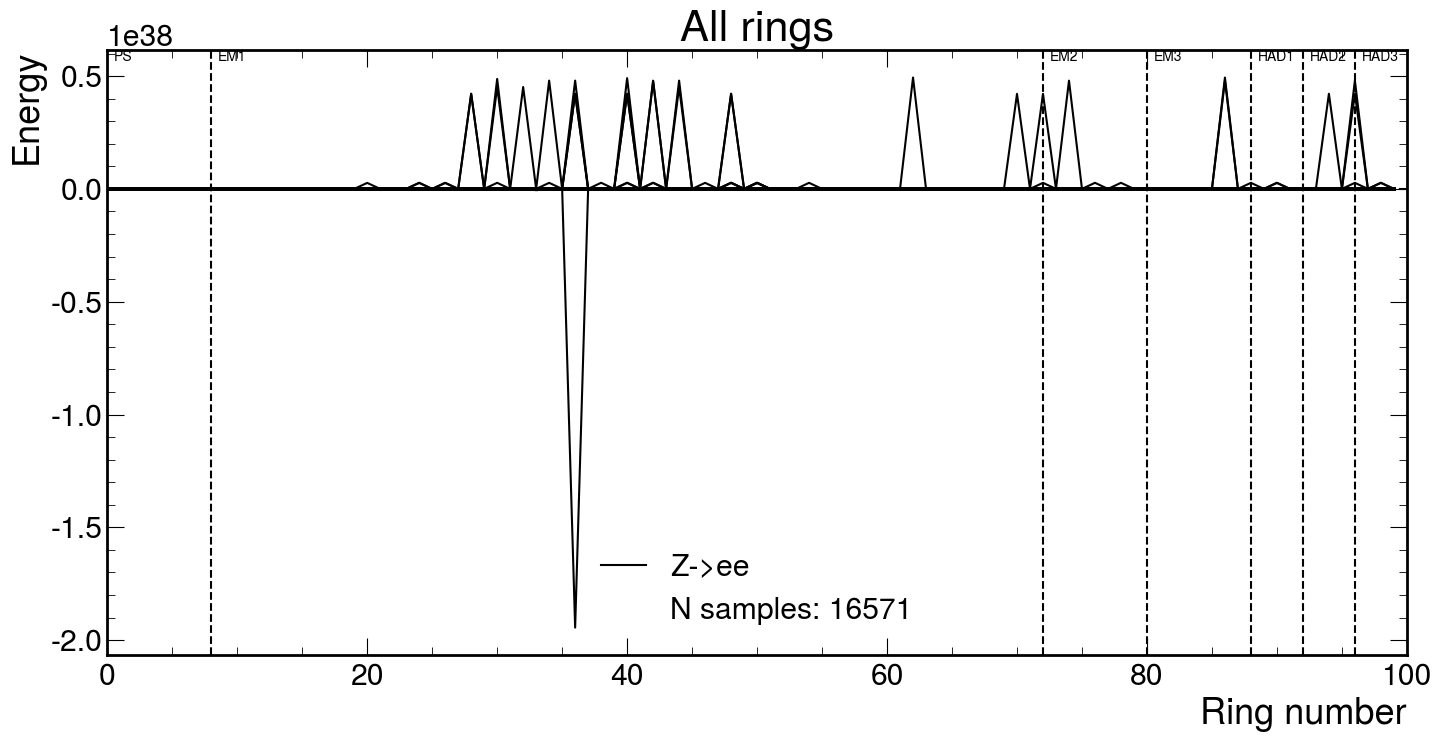

In [5]:
normalize=False
fig, ax = plt.subplots(figsize=(15, 8))
lplt.plot_all_rings(
    ntuple_pdf[rings_cols],
    ax, normalize=normalize,
    plot_kwargs=dict(color='k', label=dataset.label),
    ax_set_kwargs=dict(xlabel='Ring number'))
ax.plot([], [], ' ', label=f'N samples: {len(ntuple_pdf)}')
ax.legend()
fig.tight_layout()
all_rings_normalization_str = 'normalized' if normalize else 'not_normalized'
fig.savefig(output_dir/f'all_rings_{all_rings_normalization_str}.png', bbox_inches='tight', dpi=300)

In [6]:
ring_threshold = 1e4
n_rows = len(ntuple_pdf)
logging.info(f'Uncleaned data has {n_rows} samples')
valid_rings_idx = (
    (ntuple_pdf[rings_cols] <= ring_threshold).all(axis=1) &
    (ntuple_pdf[rings_cols] >= -ring_threshold).all(axis=1)
)
logging.info(f'Cleaned data has {valid_rings_idx.sum()} samples')
ntuple_pdf.loc[valid_rings_idx]

2025-04-11 06:40:56 | INFO | root | 1803647643 | 3 | Uncleaned data has 16571 samples
2025-04-11 06:40:56 | INFO | root | 1803647643 | 8 | Cleaned data has 4239 samples


,EventNumber,RunNumber,avgmu,cl_deta,cl_dphi,cl_e,cl_e0,cl_e1,cl_e2,cl_e233,...,el_phi,el_tight,el_vloose,mc_e,mc_et,mc_eta,mc_pdgid,mc_phi,seed_eta,seed_phi
0,7732,250401,0.0,0.2,0.2,73577.406250,0.000000,39335.265625,34154.187500,28206.892578,...,-1.2640,True,True,[80.31237030029297],[20.601646423339844],[-2.036827802658081],[11.0],[-1.2634787559509277],-2.036828,-1.263479
1,7732,250401,0.0,0.2,0.2,27544.087891,223.072586,15157.333984,11917.576172,10375.167969,...,0.9204,False,True,"[80.31237030029297, 27.909141540527344]","[20.601646423339844, 16.548999786376953]","[-2.036827802658081, 1.1133177280426025]","[11.0, -11.0]","[-1.2634787559509277, 0.9175127744674683]",1.113318,0.917513
13,7736,250401,0.0,0.2,0.2,50003.433594,-371.003571,30828.925781,19237.406250,17377.791016,...,2.9575,False,True,[56.89466094970703],[21.40040397644043],[1.6335290670394897],[11.0],[2.949134111404419],1.633529,2.949134
17,7739,250401,0.0,0.2,0.2,66009.648438,411.082336,36456.855469,28763.392578,25903.699219,...,-0.0368,False,True,[70.16959381103516],[36.65244674682617],[1.2660988569259644],[11.0],[-0.0323948860168457],1.266099,-0.032395
18,7739,250401,0.0,0.2,0.2,185857.828125,-2.422609,102820.500000,83356.281250,70794.109375,...,2.5158,True,True,"[70.16959381103516, 202.1358184814453]","[36.65244674682617, 53.701271057128906]","[1.2660988569259644, 2.000519037246704]","[11.0, -11.0]","[-0.0323948860168457, 2.5160975456237793]",2.000519,2.516098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16559,5922,250401,0.0,0.2,0.2,104288.140625,-27.140041,63688.328125,40684.937500,37409.019531,...,1.4604,False,True,[118.19849395751953],[44.64933395385742],[-1.6289235353469849],[-11.0],[1.455843448638916],-1.628924,1.455843
16560,5907,250401,0.0,0.2,0.2,102696.531250,0.000000,35122.042969,67080.679688,58829.960938,...,0.1596,True,True,[111.20631408691406],[27.408187866210938],[2.078148603439331],[11.0],[0.15369738638401031],2.078149,0.153697
16561,5907,250401,0.0,0.2,0.2,26306.771484,4.381626,6249.574707,20230.613281,18861.654297,...,-3.0802,True,True,"[111.20631408691406, 27.973175048828125]","[27.408187866210938, 27.465557098388672]","[2.078148603439331, -0.19196544587612152]","[11.0, -11.0]","[0.15369738638401031, -3.0791079998016357]",-0.191965,-3.079108
16569,5920,250401,0.0,0.2,0.2,105965.273438,0.000000,24046.392578,82083.062500,72799.617188,...,-2.4175,True,True,[116.22002410888672],[25.66124153137207],[-2.1912333965301514],[11.0],[-2.410167932510376],-2.191233,-2.410168


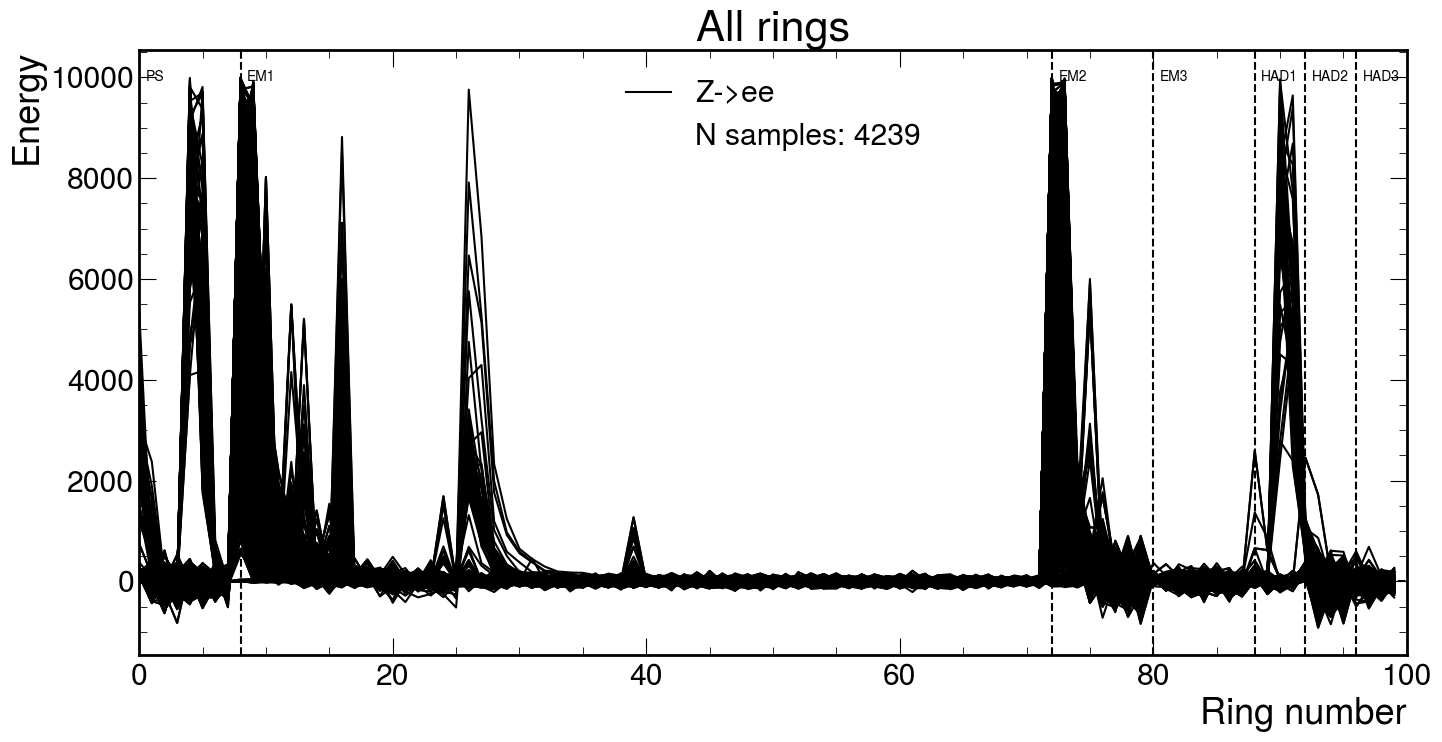

In [7]:
normalize=False
fig, ax = plt.subplots(figsize=(15, 8))
lplt.plot_all_rings(
    ntuple_pdf.loc[valid_rings_idx, rings_cols],
    ax, normalize=normalize,
    plot_kwargs=dict(color='k', label=dataset.label),
    ax_set_kwargs=dict(xlabel='Ring number'))
ax.plot([], [], ' ', label=f'N samples: {len(ntuple_pdf.loc[valid_rings_idx])}')
ax.legend()
fig.tight_layout()
all_rings_normalization_str = 'normalized' if normalize else 'not_normalized'
fig.savefig(output_dir/f'all_rings_cleaned_threshold_{ring_threshold:.4f}_{all_rings_normalization_str}.png', bbox_inches='tight', dpi=300)

# Rings Mean += Std

/root/workspaces/lorenzetti/boosted-lorenzetti/lzt_utils/plotting/pyplot.py:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


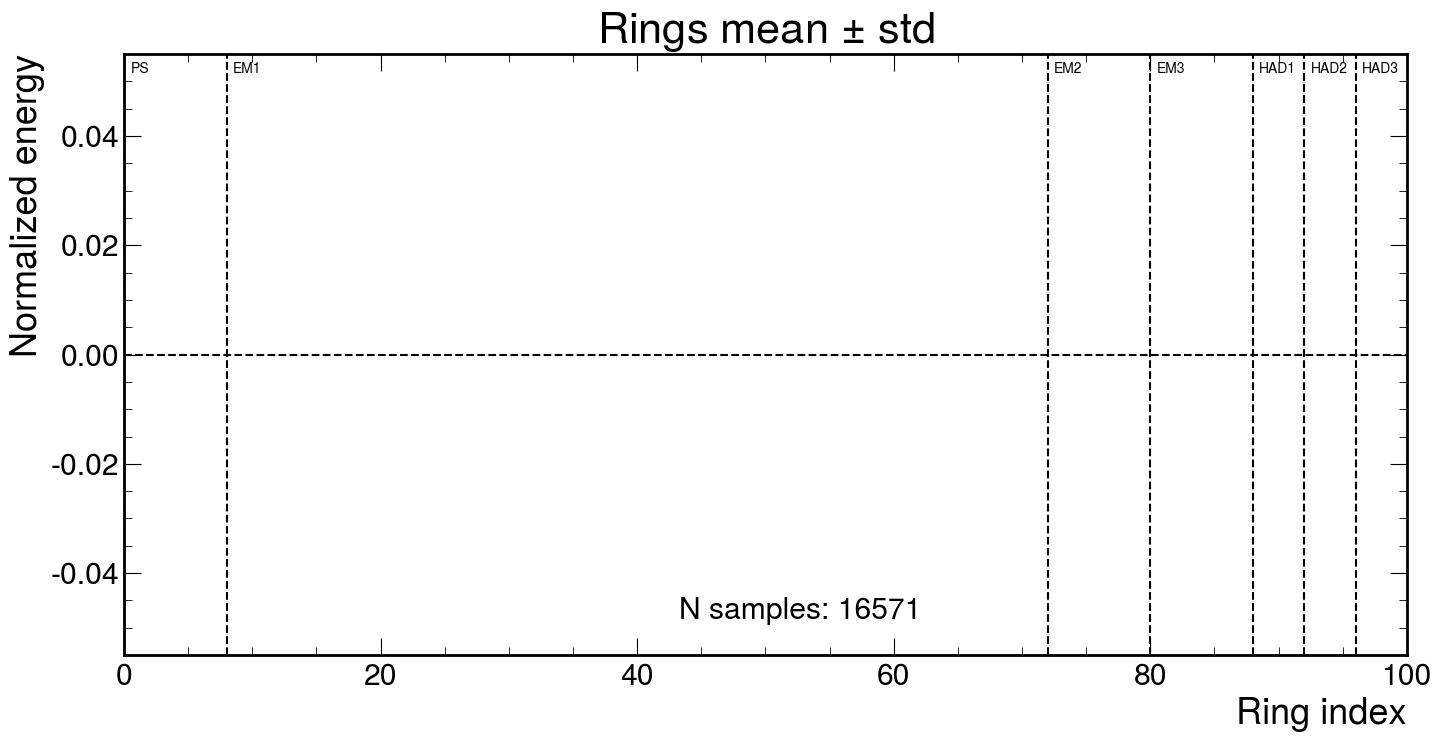

In [10]:
normalize = True
fig, ax = plt.subplots(figsize=(15, 8))
lplt.plot_rings_profile(
    ntuple_pdf[rings_cols], ax, normalize=normalize
)
ax.plot([], [], ' ', label=f'N samples: {len(ntuple_pdf)}')
ax.legend()
normalization_str = 'normalized' if normalize else 'not_normalized'
fig.tight_layout()
fig.savefig(
    output_dir/f'rings_profile_{normalization_str}.png', bbox_inches='tight', dpi=300)

/root/workspaces/lorenzetti/boosted-lorenzetti/lzt_utils/plotting/pyplot.py:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


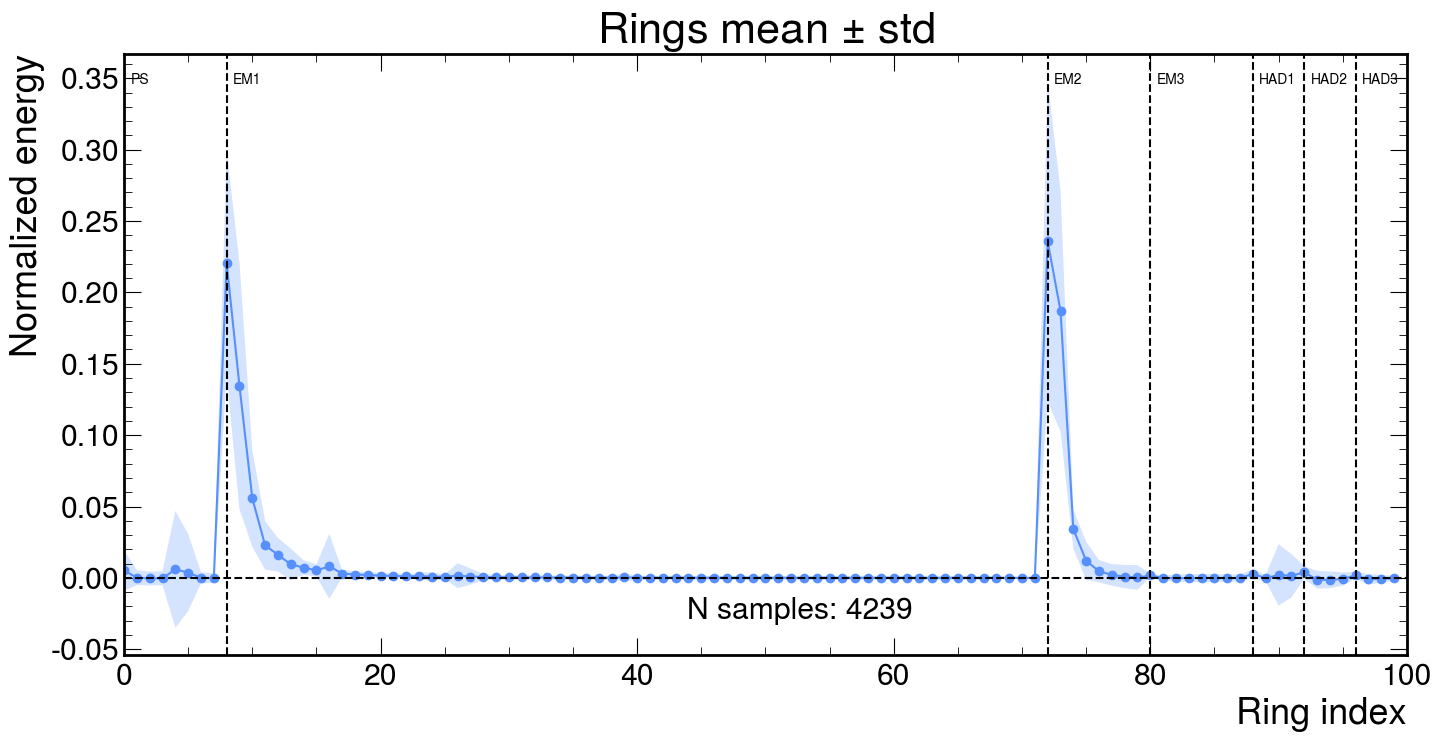

In [11]:
normalize = True
fig, ax = plt.subplots(figsize=(15, 8))
_, rings_mean, rings_std = lplt.plot_rings_profile(
    ntuple_pdf.loc[valid_rings_idx, rings_cols], ax, normalize=normalize
)
ax.plot([], [], ' ', label=f'N samples: {len(ntuple_pdf.loc[valid_rings_idx])}')
ax.legend()
normalization_str = 'normalized' if normalize else 'not_normalized'
fig.tight_layout()
fig.savefig(
    output_dir/f'rings_profile_cleaned_threshold_{ring_threshold:.4f}_{all_rings_normalization_str}.png', bbox_inches='tight', dpi=300)

# Cluster $E_{ratio}$

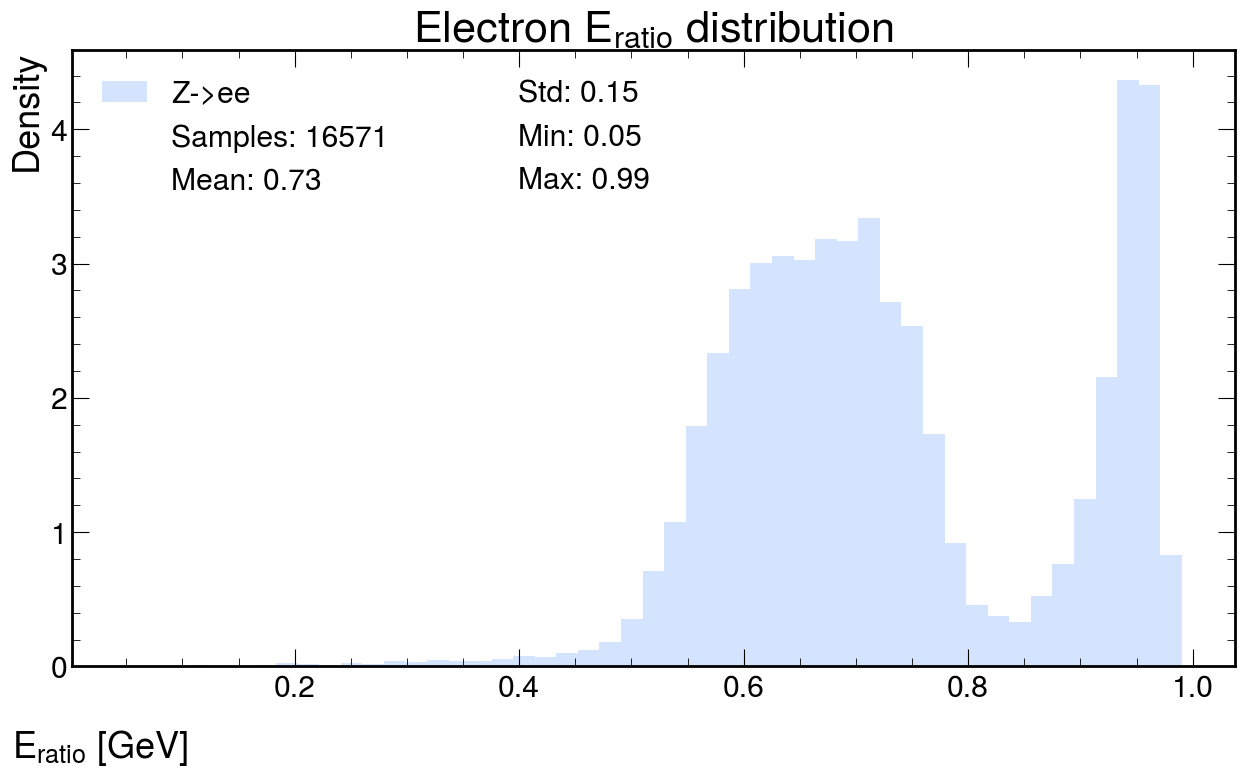

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
lplt.histplot(
    ntuple_pdf['cl_eratio'].dropna(),
    nbins=50,
    ax=ax,
    metrics=True,
    ax_set=dict(
        xlabel=r'$E_{ratio}$ [GeV]',
        ylabel='Density',
        title=r'Electron $E_{ratio}$ distribution',
    ),
    legend_kwargs=dict(
        ncols=2
    ),
    hist_kwargs=dict(
        histtype='stepfilled',
        label=dataset.label,
        density=True,
        alpha=0.25
    )
)
ax.xaxis.set_label_coords(0.1, -0.1)
fig.savefig(output_dir/'cl_eratio_distribution.png', bbox_inches='tight', dpi=300)